#### A quick demonstration of bias-hardened lensing/patchy tau/point source reconstruction in fullsky
#### - this code shows how to compute the estiamtors, and output their power spectra

In [1]:
import numpy as np, basic, curvedsky, plottools as pl, pickle, quad_func
from matplotlib.pyplot import *

In [2]:
# define parameters
Tcmb  = 2.726e6    # CMB temperature
lmax  = 2048       # maximum multipole of output normalization
rlmin, rlmax = 100, lmax  # reconstruction multipole range
sig   = 50.
ac2rad = np.pi/180./60.
L = np.linspace(0,lmax,lmax+1)

#### load unlensed and lensed Cls

In [3]:
lcl = basic.aps.read_cambcls('../data/lensedcls.dat',2,lmax,4,bb=True)/Tcmb**2
nl  = np.zeros((4,lmax+1))
nl[0,:] = (sig*ac2rad/Tcmb)**2
nl[1,:] = 2*nl[0,:]
nl[2,:] = 2*nl[0,:]
ocl = lcl + nl

#### calculate normalizations

In [4]:
falm = {}
falm['T'] = ['','test0.pkl','test1.pkl']

In [5]:
# generate CMB alms 
Talm0 = curvedsky.utils.gauss1alm(lmax,lcl[0,:])
Talm1 = curvedsky.utils.gauss1alm(lmax,lcl[0,:])
Talm0 += curvedsky.utils.gauss1alm(lmax,nl[0,:])
Talm1 += curvedsky.utils.gauss1alm(lmax,nl[0,:])
pickle.dump((Talm0),open(falm['T'][1],"wb"),protocol=pickle.HIGHEST_PROTOCOL)
pickle.dump((Talm1),open(falm['T'][2],"wb"),protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
qobj = quad_func.quad(rlz=[0,1],qtype='tau',bhe=['lens'],lcl=lcl,ocl=ocl,ifl=ocl,falm=falm,rlmin=rlmin,rlmax=rlmax,n0max=1,nside=1024,qlist=['TT'])
qobj.fname('/global/homes/t/toshiyan/trash/',['0','1'],'')

In [7]:
qobj.qrec_flow(run=['norm','n0'])

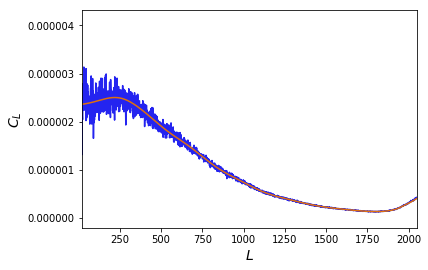

In [8]:
pl.plot_1dstyle()
l, al = np.loadtxt(qobj.f['TT'].al,unpack=True,usecols=(0,1))
l, n0 = np.loadtxt(qobj.f['TT'].n0bs,unpack=True,usecols=(0,1))
plot(l,n0)
plot(l,al)